1.데이터 불러오기

In [148]:
# 자료셋을 샘플 확인
import pandas as pd

# CSV 파일 경로 설정
file_path = r'C:/Users/bluecom011/Desktop/3주차/01.11(데이터 전처리)/그랜드코리아레저(주)_영업점별 고객 식음료 주문 내역_20230630.csv'

# CSV 파일 읽기 (인코딩 지정)
df = pd.read_csv(file_path, encoding='utf-8')

# DataFrame 확인
df.head(7)

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31
5,2019-01-16,CX,코엑스,1002,라이스류,10003,차돌된장찌개,Soybean Paste Stew,M,JPN,일본,1
6,2019-03-09,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,VNM,베트남,6


In [170]:
df1 = df[df['고객여권발급국가명'] == '그리스']
df1.head(10)

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량,년,월,요일
2222,2019-01-08,HT,드래곤,1003,면류,1305,소고기카레우동,Beef Curry Udong(소고기카레우동),M,GRC,그리스,1,2019,1,Tuesday
846003,2019-03-08,HT,드래곤,1002,라이스류,1208,햄버거스테이크,Hamburger Steak(햄버거스테이크),M,GRC,그리스,1,2019,3,Friday
936927,2022-09-28,LT,롯데,2009,주류(일반용),2095,위스키 온더락,NaN,M,GRC,그리스,6,2022,9,Wednesday
1302704,2023-05-19,HT,드래곤,9001,기타,1301,컨디션(VIP),NaN,M,GRC,그리스,1,2023,5,Friday
1377644,2019-03-19,HT,드래곤,1001,숲/샌드위치,1047,세븐럭샌드위치,7 Luck Sandwich(세븐럭샌드위치),M,GRC,그리스,1,2019,3,Tuesday


In [149]:
# 3.데이터셋의 정보확인 p241
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545008 entries, 0 to 1545007
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   지급일자        1545008 non-null  object
 1   영업점코드       1545008 non-null  object
 2   영업점명        1545008 non-null  object
 3   식음메뉴그룹코드    1545008 non-null  int64 
 4   식음메뉴그룹명     1545008 non-null  object
 5   식음메뉴코드      1545008 non-null  int64 
 6   식음메뉴명(한글)   1545008 non-null  object
 7   식음메뉴명(영문)   603104 non-null   object
 8   성별          1355792 non-null  object
 9   고객여권발급국가코드  1355826 non-null  object
 10  고객여권발급국가명   1355684 non-null  object
 11  주문수량        1545008 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 141.4+ MB


In [150]:
#4.결측여부 확인
df.isnull().sum()

지급일자               0
영업점코드              0
영업점명               0
식음메뉴그룹코드           0
식음메뉴그룹명            0
식음메뉴코드             0
식음메뉴명(한글)          0
식음메뉴명(영문)     941904
성별            189216
고객여권발급국가코드    189182
고객여권발급국가명     189324
주문수량               0
dtype: int64

<Axes: >

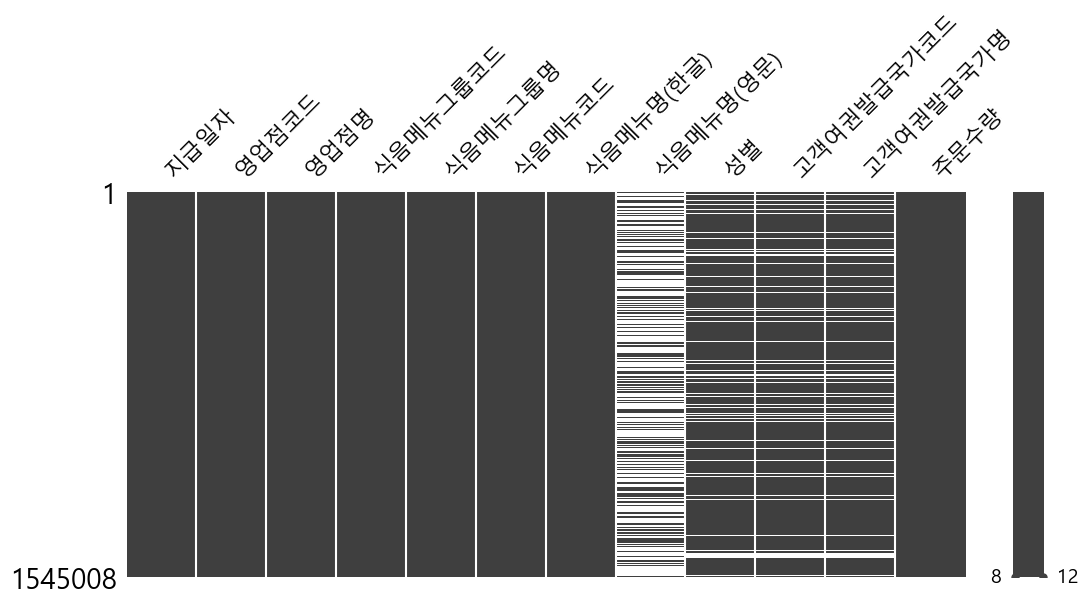

In [151]:
#5.결측치 시각화

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 결측치 시각화
import missingno as msno
msno.matrix(df, figsize=(12, 5))

In [152]:
# 성별 필드의 결측치 확인
print(df['성별'].value_counts())

# 성별 필드의 결측치를 최빈값으로 채우기
most_common_gender = df['성별'].mode()[0]
df['성별'] = df['성별'].fillna(most_common_gender)


성별
M    1017112
F     338680
Name: count, dtype: int64


7.주문수량 상위10개 보기

In [153]:
# 주문수량을 기준으로 내림차순 정렬
sorted_df = df.sort_values('주문수량', ascending=False)

# 상위 10개 데이터 보기
sorted_df.head(10)


,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
1446287,2023-01-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2911
1202737,2022-12-20,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
1008673,2022-12-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
647787,2023-01-03,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2881
1447299,2023-01-17,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
1105883,2022-11-16,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
83794,2020-08-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2593
1440888,2022-07-06,CX,코엑스,2011,음료,2057,펩시콜라,NaN,M,NaN,NaN,2560
1440729,2022-01-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2441
644530,2021-12-22,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2436


8.value_counts 이용하여 데이터셋 집계하기

In [154]:
#-> 영업점명 이용 고객수
customers_by_store = df['영업점명'].value_counts()
customers_by_store.head()

영업점명
코엑스    610732
드래곤    532755
롯데     401521
Name: count, dtype: int64

In [155]:
# ->식음메뉴명(한글) 별 이용 고객수
customers_by_menu = df['식음메뉴명(한글)'].value_counts()
customers_by_menu.head()

식음메뉴명(한글)
계절과일(VIP)    33083
생맥주          25995
펩시콜라         16658
흑후추스테이크      13740
미에로화이바       13459
Name: count, dtype: int64

In [156]:
#-> 성별 별 고객수
customers_by_gender = df['성별'].value_counts()
customers_by_gender.head()

성별
M    1206328
F     338680
Name: count, dtype: int64

In [157]:
#->고객 여권발급국가명 병 이용 고객수
customers_by_passport_country = df['고객여권발급국가명'].value_counts()
customers_by_passport_country.head()


고객여권발급국가명
중국            346182
일본            173569
미국            165226
대한민국(영주권자)    158386
대만            119346
Name: count, dtype: int64

9.그룹바이를 이용하여 주문수량 집계하기

In [158]:
#->영업점 별 주문수량 합 ,평균
# 영업점 별 주문수량 합
주문수량합 = df.groupby('영업점명')['주문수량'].sum()

# 영업점 별 주문수량 평균
주문수량평균 = df.groupby('영업점명')['주문수량'].mean()

# 결과 출력
주문수량합.head()
주문수량평균.head()


영업점명
드래곤    10.304444
롯데      5.031204
코엑스     8.296675
Name: 주문수량, dtype: float64

In [159]:
# 식음메뉴명(한글) 별 주문 수량 합
order_quantity_sum_by_menu = df.groupby('식음메뉴명(한글)')['주문수량'].sum()

# 결과 출력
#print("식음메뉴명(한글) 별 주문 수량 합:\n", order_quantity_sum_by_menu)
order_quantity_sum_by_menu.head()


식음메뉴명(한글)
(1인분)         8818
(BAR)           84
(NO ICE)      1406
(NO SUGAR)    3972
(더블)           623
Name: 주문수량, dtype: int64

In [160]:
#고객여권발급국가별 주문수량 합
order_quantity_sum_by_passport_country = df.groupby('고객여권발급국가명')['주문수량'].sum()

# 결과 출력
#print("고객 여권발급국가명 별 주문 수량 합:\n", order_quantity_sum_by_passport_country)
order_quantity_sum_by_passport_country.head()


고객여권발급국가명
그레나다           14
그리스            10
나이지리아          25
남아프리카 공화국      77
네덜란드         3626
Name: 주문수량, dtype: int64

In [161]:
#영업점 별 고객여권발급국가별 주문수량합
영업점발급국가별 = df.groupby(['영업점명', '고객여권발급국가명'])['주문수량'].sum()

# 결과 출력
print("영업점 별 고객 여권발급국가명 별 주문 수량 합:\n", 영업점발급국가별)
#영업점발급국가별.head()

영업점 별 고객 여권발급국가명 별 주문 수량 합:
 영업점명  고객여권발급국가명
드래곤   그레나다             6
      그리스              4
      나이지리아           15
      남아프리카 공화국       34
      네덜란드          2349
                   ...  
코엑스   핀랜드              4
      필리핀           5092
      헝가리             26
      호주           31386
      홍콩            8255
Name: 주문수량, Length: 251, dtype: int64


10. 지급일자를 date형식으로 변경하여 년,월, 요일 추가하기

교재 215,216

In [166]:
import pandas as pd

# '지급일자' 열을 date 형식으로 변경
df['지급일자'] = pd.to_datetime(df['지급일자'])

# '년', '월', '요일' 열 추가
df['년'] = df['지급일자'].dt.year
df['월'] = df['지급일자'].dt.month
df['요일'] = df['지급일자'].dt.day_name()

# 결과 확인
#print(df[['지급일자', '년', '월', '요일']])
df.head()

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량,년,월,요일
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,Monday
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3,2019,3,Tuesday
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7,2019,3,Tuesday
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1,2019,2,Sunday
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31,2019,3,Saturday


11. 고민해보기
식음메뉴명(한글)은 모든 자료가 있지만 식음메뉴명(영문)은 결측치가 많음 이떄 어떻게 식음메뉴명(영문)을 한글메뉴명을 이용하여 채울것인가?

In [171]:
import seaborn as sns

In [ ]:
#식음메뉴그룹코드로 묶기
menugroup = df.groupby(['식음메뉴그룹코드'])['주문수량'].sum()

# 결과 출력
#print("대륙별 집계:\n", Final)
menugroup.head() 

## 12. 국가를 대륙별로 집계내고자 할때 어떻게 해야하는가?

In [ ]:
len(df['고객여권발급국가명'].unique()) #국가 리스트 107개

107

In [ ]:
df[df['고객여권발급국가명']=='중국'].head()

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량,년,월,요일
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,Monday
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1,2019,2,Sunday
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31,2019,3,Saturday
8,2019-01-31,HT,드래곤,2011,음료,2145,"우유(HOT,SUGAR)",NaN,F,CHN,중국,2,2019,1,Thursday
11,2019-03-01,HT,드래곤,1002,라이스류,1276,나주곰탕,NaJu Beef Bone Soup(나주곰탕),F,CHN,중국,15,2019,3,Friday


In [ ]:
# 국가별대륙리스트.csv 를 받아와서 국가코드나 국가명이 같은것을 기준으로 merge() 시키고
# CSV 파일 경로 설정
file_path2 = r'C:\Users\bluecom011\Desktop\3주차\01.11(데이터 전처리)\국가별대륙리스트.csv'

# CSV 파일 읽기 (인코딩 지정)
nalaList = pd.read_csv(file_path2, encoding='cp949')
# nalaList.iloc[:,2:].head() 원하는 위치만 뽑기
nalaList.head()

,연도(BASE_YY),국가부호(CNTY_CD),국가명(CNTY_NM),대륙_경제권(CNTN_EBK_UNFC_CLSF_NM)
0,2022,AF,아프카니스탄,아시아
1,2022,AM,아르메니아,아시아
2,2022,AZ,아제르바이잔,아시아
3,2022,BD,방글라데시,아시아
4,2022,BN,브루나이,아시아


In [ ]:
nalaList.rename(columns={'국가명(CNTY_NM)':'고객여권발급국가명'},inplace=True)

In [ ]:
result=pd.merge(df,nalaList, how='left', on='고객여권발급국가명')
result.head()

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량,년,월,요일,연도(BASE_YY),국가부호(CNTY_CD),대륙_경제권(CNTN_EBK_UNFC_CLSF_NM)
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,Monday,2022.0,CN,아시아
1,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,Monday,2022.0,CN,APEC
2,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,Monday,2022.0,CN,아셈
3,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3,2019,3,Tuesday,2022.0,JP,아시아
4,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3,2019,3,Tuesday,2022.0,JP,OECD


In [ ]:
#대륙별 집계
Final = result.groupby(['대륙_경제권(CNTN_EBK_UNFC_CLSF_NM)', '고객여권발급국가명'])['주문수량'].sum()

# 결과 출력
#print("대륙별 집계:\n", Final)
Final.head() 

대륙_경제권(CNTN_EBK_UNFC_CLSF_NM)  고객여권발급국가명
APEC                           뉴질랜드          12119
                               대만           257321
                               말레이시아         24256
                               멕시코            3513
                               미국           357681
Name: 주문수량, dtype: int64

13. 이 자료에서 할 수있는  기술통계 및 시각화는 어떤게 있을까?

히트맵, 산점도

14. 이 자료와 연결하여서 분석할 수 있는 그외 데이터는 어떤게 있을까?


